# House Price Prediction With ML

#### Team Predictors
* Sunil
* Samuel 
* Sanjay
* Preneeth

### Introduction

This project is about helping out house buyers & real estate owners in India to estimate the price of House in a given area. A price prediction tool needs to built using Machine Learning leveraging the past transcation data of various cities in india.

<img src="https://github.com/preneetho/ML/blob/master/Capstone%20Project/House1.jpg?raw=true">

### 1. Understanding Client & their Problems

#### 1.1. Current Situation

In the current market for home buyers and sellers there is no tool available to estimate the price of a house. Home buyers & sellers end up with long negotiations before finalizing the prices. The reason for it is there is no benchmark for house price. Buyers tries to reduce the price unreasonably without understanding current market price. Sellers quote exorbitant prices without considering the true value of the property. The prices of houses are decided by word of mouth and there is no scientific approach to decide on the price by considering all the factors like location, size, age etc.

#### 1.2. Opportunity for improvement

To overcome the above problem, there should be benchmark for the house prices by considering all external factors which decide on price of the house. We need to have tool like KBB (Kelley Blue Book) in US to get a best price for cars. A similar tool needs to be implemented for House Pricing. It would help both buyer and seller to come quickly to a deal closing price.

#### 1.3. Data Requirement

To build such tool, we would require past house transaction data with all details like area of house, type of house, rooms, location, age, price and many more attributes of the house. The attributes of house will help in deciding the right price for the house.

#### 1.4. Source of data and challenges

The data needs to be collected from various sources. The house transactions details can be obtained from District Registar office. It will contain the most of the house details + price. We would also need details about the locality, like schools, offices, railway stations, bus stations. These details can be obtained from Muncipal corporations. Getting all the details from various sources would be a big challenge, as the data might not be in required electronic format. Good amount of ground work need to be done to collate the data from different source systems and consolidate it for further processing.

#### 1.5. Size of the data

We would require atleast 5 years of data from multiple locations. The data should have pricing for various sizes of houses, types of house and location of houses. The effectiveness of the tool will depend of the quality and quantity of the past data. 

### 2. Understand the Data

#### 2.1. Import necessary Libraries

In [213]:
#!pip install geopandas
#!pip install geopy
#!pip install folium

In [214]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split

#import statsmodels.api as sm
from sklearn import metrics
from sklearn import datasets
import seaborn as sn

from sklearn import svm
from scipy.stats import zscore

from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from scipy.stats import spearmanr, pearsonr
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Imputer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
%matplotlib inline
sn.set(color_codes = True)
import statsmodels.api as sm
from sklearn.model_selection import KFold
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor)
from sklearn.model_selection import RandomizedSearchCV

#### 2.2. Load the Data

In [215]:
dataSet = pd.read_csv('innercity.csv')
dataSet.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3034200666,20141107T000000,808100,4,3.25,3020,13457,1.0,0,0,...,0,1956,0,98133,47.7174,-122.336,2120,7553,1,16477
1,8731981640,20141204T000000,277500,4,2.50,2550,7500,1.0,0,0,...,800,1976,0,98023,47.3165,-122.386,2260,8800,0,10050
2,5104530220,20150420T000000,404000,3,2.50,2370,4324,2.0,0,0,...,0,2006,0,98038,47.3515,-121.999,2370,4348,0,6694
3,6145600285,20140529T000000,300000,2,1.00,820,3844,1.0,0,0,...,0,1916,0,98133,47.7049,-122.349,1520,3844,0,4664
4,8924100111,20150424T000000,699000,2,1.50,1400,4050,1.0,0,0,...,0,1954,0,98115,47.6768,-122.269,1900,5940,0,5450


In [216]:
dataSet.shape

(21613, 23)

In [217]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
cid                 21613 non-null int64
dayhours            21613 non-null object
price               21613 non-null int64
room_bed            21613 non-null int64
room_bath           21613 non-null float64
living_measure      21613 non-null int64
lot_measure         21613 non-null int64
ceil                21613 non-null float64
coast               21613 non-null int64
sight               21613 non-null int64
condition           21613 non-null int64
quality             21613 non-null int64
ceil_measure        21613 non-null int64
basement            21613 non-null int64
yr_built            21613 non-null int64
yr_renovated        21613 non-null int64
zipcode             21613 non-null int64
lat                 21613 non-null float64
long                21613 non-null float64
living_measure15    21613 non-null int64
lot_measure15       21613 non-null int64
furnished           2

<b>Findings:</b>
    * There are 21613 rows and 23 columns
    * All are numeric data except for dayhours
    * Looks like there are no null values. We need to explore further to confirm it.

In [218]:
print ("Bed Rooms : ")
print (*list(dataSet.room_bed.unique()))

print ("Bath Rooms : ")
print (*list(dataSet.room_bath.unique()))

print ("Ceil : ")
print (*list(dataSet.ceil.unique()))

print ("Coast : ")
print (*list(dataSet.coast.unique()))

print ("Sight : ")
print (*list(dataSet.sight.unique()))

print ("Condition : ")
print (*list(dataSet.condition.unique()))

print ("Quality : ")
print (*list(dataSet.quality.unique()))

print ("Built Year : ")
years = dataSet.yr_built.copy()
years = years.sort_values()
print (*list(years.unique()))

print ("Renovated Year : ")
years = dataSet.yr_renovated.copy()
years = years.sort_values()
print (*list(years.unique()))

print ("Furnished : ")
print (*list(dataSet.furnished.unique()))

Bed Rooms : 
4 3 2 5 6 1 8 33 7 0 9 10 11
Bath Rooms : 
3.25 2.5 1.0 1.5 1.75 2.0 2.75 2.25 3.0 4.0 4.5 3.5 5.25 4.75 4.25 5.0 7.75 3.75 0.75 5.5 6.75 1.25 6.25 0.0 5.75 6.0 0.5 6.5 7.5 8.0
Ceil : 
1.0 2.0 3.0 1.5 2.5 3.5
Coast : 
0 1
Sight : 
0 2 4 3 1
Condition : 
5 3 4 2 1
Quality : 
9 8 6 7 10 11 5 13 12 4 3 1
Built Year : 
1900 1901 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
Renovated Year : 
0 1934 1940 1944 1945 1946 1948 1950 1951 1953 1954 1955 1956 1957 1958 

#### 2.3. Understand each attribute at high level

<Table border=1, align=left>
<TR align=left>
    <TH>#</TH>
    <TH>Col Name</TH>
    <TH>Description</TH>
    <TH>Type</TH>
    <TH>Data Type</TH>
    <TH>Categorical Attributes</TH>
    <TH>Remarks</TH>
</TR>

    <TR style="color:red;">
        <TD>
            1.
        </TD>
        <TD>
            cid
        </TD>
        <TD>
            A notation for a house
        </TD>
        <TD>Indepenent Variable</TD>
         <TD>
            Numeric
        </TD>
         <TD>
            No
        </TD>
         <TD>
            This attribute does not have any significance.
        </TD>
    </TR>
    
    <TR style="color:red;">
        <TD>
            2.
        </TD>
        <TD>
            dayhours
        </TD>
        <TD>
            Date on which House was sold
        </TD>
        <TD>Indepenent Variable</TD>
         <TD>
            String
        </TD>
         <TD>
            No
        </TD>
         <TD>
            The format of the data is YYYYMMDDT000000. The date need to be extracted from it.
        </TD>
    </TR>

    
    
    <TR >
        <TD>
            3.
        </TD>
        <TD>
            room_bed
        </TD>
        <TD>
            Number of Bedrooms
        </TD>
        <TD>Indepenent Variable</TD>
         <TD>
            Numeric
        </TD>
         <TD>
            Yes
        </TD>
         <TD>
            &nbsp;
        </TD>
    </TR>
    
    <TR >
        <TD>
            4.
        </TD>
        <TD>
            room_bath
        </TD>
        <TD>
            Number of bathrooms
        </TD>
        <TD>Indepenent Variable</TD>
         <TD>
            Numeric
        </TD>
         <TD>
            Yes
        </TD>
         <TD>
            &nbsp;
        </TD>
    </TR>
    
    <TR style="color:red;">
        <TD>
            5.
        </TD>
        <TD>
            living_measure
        </TD>
        <TD>
            square footage of the home
        </TD>
        <TD>Indepenent Variable</TD>
         <TD>
            Numeric
        </TD>
         <TD>
            No
        </TD>
         <TD>
            It is Ceil_Measure + Basement Measure. So there is no need to keep this column.
            
        </TD>
    </TR>
    
    <TR >
        <TD>
            6.
        </TD>
        <TD>
            lot_measure
        </TD>
        <TD>
            Lot size, refers to the size of the land that your property is on
        </TD>
        <TD>Indepenent Variable</TD>
         <TD>
            Numeric
        </TD>
         <TD>
            No
        </TD>
         <TD>
            There is lot_measure15 column which gives the lot area measurement as on 2015. We need decide to retain lot_measure15 column or this column. We will decide it after further analysis.
        </TD>
    </TR>
    
    <TR >
        <TD>
            7.
        </TD>
        <TD>
            ceil
        </TD>
        <TD>
            Number of floors
        </TD>
        <TD>Indepenent Variable</TD>
         <TD>
            Numeric
        </TD>
         <TD>
            No
        </TD>
         <TD>
            It holds values 1.0 2.0 3.0 1.5 2.5 3.5
        </TD>
    </TR>
    
    <TR >
        <TD>
            8.
        </TD>
        <TD>
            coast
        </TD>
        <TD>
            House which has a view to a waterfront
        </TD>
        <TD>Indepenent Variable</TD>
         <TD>
            Numeric
        </TD>
         <TD>
            Yes
        </TD>
         <TD>
            0 - It has no waterfront view
            1 - It has waterfront view
        </TD>
    </TR>
    
    <TR style="color:red;">
        <TD>
            9.
        </TD>
        <TD>
            Sight
        </TD>
        <TD>
            Has been viewed
        </TD>
        <TD>Indepenent Variable</TD>
         <TD>
            Numeric
        </TD>
         <TD>
            Yes
        </TD>
         <TD>
            Holds values 0, 1, 2, 3, 4. The price of the house will not have any significance on number of visits. hence it can be droppped.
        </TD>
    </TR>
    
    <TR >
        <TD>
            10.
        </TD>
        <TD>
            condition
        </TD>
        <TD>
            How good the condition is (Overall)
        </TD>
        <TD>Indepenent Variable</TD>
         <TD>
            Numeric
        </TD>
         <TD>
            Yes
        </TD>
         <TD>
            Holds values 1, 2, 3, 4, 5. Rating for condition -  1 being bad condition and 5 being Excellent condition.
        </TD>
    </TR>
    
    <TR >
        <TD>
            11.
        </TD>
        <TD>
            quality
        </TD>
        <TD>
            Grade given to the housing unit, based on grading system
        </TD>
        <TD>Indepenent Variable</TD>
         <TD>
            Numeric
        </TD>
         <TD>
            Yes
        </TD>
         <TD>
            Quality scale - 1 to 13.
        </TD>
    </TR>
    
    <TR>
        <TD>
            12.
        </TD>
        <TD>
            ceil_measure
        </TD>
        <TD>
            square footage of house apart from basement
        </TD>
        <TD>Indepenent Variable</TD>
         <TD>
            Numeric
        </TD>
         <TD>
            No
        </TD>
         <TD>
            The house area is covered in living_measure15, however we need to decide to retain this column or living_measure15 after futher analysis.
        </TD>
    </TR>
    
    <TR>
        <TD>
            13.
        </TD>
        <TD>
            basement
        </TD>
        <TD>
            square footage of the basement
        </TD>
        <TD>Indepenent Variable</TD>
         <TD>
            Numeric
        </TD>
         <TD>
            No
        </TD>
         <TD>
            The property will have better value if there is basement. We can convert it into a categorical column too.
        </TD>
    </TR>
    
    <TR >
        <TD>
            14.
        </TD>
        <TD>
            yr_built
        </TD>
        <TD>
            Built Year
        </TD>
        <TD>Indepenent Variable</TD>
         <TD>
            Numeric
        </TD>
         <TD>
            No
        </TD>
         <TD>
            Data is available from 1900 to 2015
        </TD>
    </TR>
    
    <TR style="color:red;">
        <TD>
            15.
        </TD>
        <TD>
            yr_renovated
        </TD>
        <TD>
            Year when house was renovated
        </TD>
        <TD>Indepenent Variable</TD>
         <TD>
            Numeric
        </TD>
         <TD>
            No
        </TD>
         <TD>
            0 - Means the house was not renovated
            Year - The year when it was renovated.
        </TD>
    </TR>
    
    <TR >
        <TD>
            16.
        </TD>
        <TD>
            zipcode
        </TD>
        <TD>
            Zip Code of the area
        </TD>
        <TD>Indepenent Variable</TD>
         <TD>
            Numeric
        </TD>
         <TD>
            No
        </TD>
         <TD>
            &nbsp;
        </TD>
    </TR>
    
    <TR >
        <TD>
            17.
        </TD>
        <TD>
            lat
        </TD>
        <TD>
            Latitude coordinate
        </TD>
        <TD>Indepenent Variable</TD>
         <TD>
            Numeric
        </TD>
         <TD>
            No
        </TD>
         <TD>
            There is Zip Code Available. Do we need to keep this column? We will decide it later during bi variant analysis
        </TD>
    </TR>
    
    <TR >
        <TD>
            18.
        </TD>
        <TD>
            long
        </TD>
        <TD>
            Longitude coordinate
        </TD>
        <TD>Indepenent Variable</TD>
         <TD>
            Numeric
        </TD>
         <TD>
            No
        </TD>
         <TD>
            There is Zip Code Available. Do we need to keep this column? We will decide it later during bi variant analysis
        </TD>
    </TR>
    
    <TR style="color:red;">
        <TD>
            19.
        </TD>
        <TD>
            living_measure15
        </TD>
        <TD>
             Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area.
        </TD>
        <TD>Indepenent Variable</TD>
         <TD>
            Numeric
        </TD>
         <TD>
            No
        </TD>
         <TD>
            It has the latest area as on 2015. But there are houses sold in 2014 that means this column was not considered for pricing of house.
        </TD>
    </TR>
    
    <TR style="color:red;">
        <TD>
            20.
        </TD>
        <TD>
            lot_measure15
        </TD>
        <TD>
            lotSize area in 2015(implies-- some renovations)
        </TD>
        <TD>Indepenent Variable</TD>
         <TD>
            Numeric
        </TD>
         <TD>
            No
        </TD>
         <TD>
            It has the latest area as on 2015. But there are houses sold in 2014 that means this column was not considered for pricing of house.
        </TD>
    </TR>
    
    <TR >
        <TD>
           21.
        </TD>
        <TD>
            furnished
        </TD>
        <TD>
            House furnished or not
        </TD>
        <TD>Indepenent Variable</TD>
         <TD>
            Numeric
        </TD>
         <TD>
            Yes
        </TD>
         <TD>
            0- Not Furnished
            1- Furnished
        </TD>
    </TR>
    
    <TR style="color:red;">
        <TD>
            22.
        </TD>
        <TD>
             total_area
        </TD>
        <TD>
            Measure of both living and lot
        </TD>
        <TD>Indepenent Variable</TD>
         <TD>
            Numeric
        </TD>
         <TD>
            No
        </TD>
         <TD>
            It is sum of lot_measure + living Measure. So there is no significance of keeping it.
        </TD>
    </TR>
    
    <TR style="font-weight:bold">
        <TD>
            23.
        </TD>
        <TD>
            price
        </TD>
        <TD>
            Price of the House
        </TD>
        <TD>Target Variable</TD>
         <TD>
            Numeric
        </TD>
         <TD>
            No
        </TD>
         <TD>
            &nbsp;
        </TD>
    </TR>
    
</Table>

#### 2.3. Fix columns in the Dataset


1. <b>cid</b> - This is just a identifier, need to drop the column
2. <b>dayhours</b> - This column by itself does not have any significance. Need to extract the year sold value and subtract it from yr_built column to get age of the house when sold.
3. <b>living_measure</b> - Drop this column. Reason is mentioned in above table
4. <b>total_area</b> - Drop this column. Reason is mentioned in above table
5. <b>sight</b> - Drop this column. Reason is mentioned in above table
6. <b>lot_measure15</b> - Drop this column. Reason is mentioned in above table
7. <b>living_measure15</b> - Drop this column. Reason is mentioned in above table
8. <b>yr_renovated</b> - Any house renovated 5 years prior to selling would get a better price. We will create new columns to find post renovation in how many years the house was sold.

In [219]:
# Drop cid column
dataSet.drop('cid', axis=1, inplace=True)


In [220]:
# Find Age of the house at the time of sale.
dataSet["yr_sold"] = dataSet["dayhours"].apply(lambda x:x[:4]).astype(int)
dataSet["age_sold"] = dataSet.yr_sold - dataSet.yr_built


In [221]:
# Find basement exists or not; Drop basement column
dataSet['Have_basement'] = dataSet['basement'].apply(lambda x: 1 if x>0 else 0)


In [222]:
# Drop columns living_measure, living_measure15 ,lot_measure15, total_area,  Sight, dayhours
dataSet.drop(['living_measure','living_measure15','lot_measure15','total_area', 'sight', 'dayhours'], axis=1, inplace=True)

In [223]:
# Handle Renovation column. 4 New columns added to bucket the years of renovation
dataSet['years_renovated'] = dataSet['yr_sold'] - dataSet['yr_renovated']
dataSet['renovation_in_15to20_Years'] = dataSet['years_renovated'].apply(lambda x: 1 if (x>15 and x<=20) else 0)
dataSet['renovation_in_10to15_Years'] = dataSet['years_renovated'].apply(lambda x: 1 if (x>10 and x<=15) else 0)
dataSet['renovation_in_5to10_Years'] = dataSet['years_renovated'].apply(lambda x: 1 if (x>5 and x<=10) else 0)
dataSet['renovation_in_0to5_Years'] = dataSet['years_renovated'].apply(lambda x: 1 if (x>=0 and x<=5) else 0)
dataSet.drop(['years_renovated', 'yr_renovated'] , axis=1, inplace=True)


#### 2.4. Fix column type and data type

In [225]:
# Set Categorical columns
dataSet.coast = pd.Categorical(dataSet.coast)
dataSet.condition = pd.Categorical(dataSet.condition)
dataSet.quality = pd.Categorical(dataSet.quality)
dataSet.furnished = pd.Categorical(dataSet.furnished)
dataSet.Have_basement = pd.Categorical(dataSet.Have_basement)
dataSet.zipcode = pd.Categorical(dataSet.zipcode)
dataSet.yr_built = pd.Categorical(dataSet.yr_built)
dataSet.yr_sold = pd.Categorical(dataSet.yr_sold)
dataSet.renovation_in_15to20_Years = pd.Categorical(dataSet.renovation_in_15to20_Years)
dataSet.renovation_in_10to15_Years = pd.Categorical(dataSet.renovation_in_10to15_Years)
dataSet.renovation_in_5to10_Years = pd.Categorical(dataSet.renovation_in_5to10_Years)
dataSet.renovation_in_0to5_Years = pd.Categorical(dataSet.renovation_in_0to5_Years)

In [226]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
price                         21613 non-null int64
room_bed                      21613 non-null int64
room_bath                     21613 non-null float64
lot_measure                   21613 non-null int64
ceil                          21613 non-null float64
coast                         21613 non-null category
condition                     21613 non-null category
quality                       21613 non-null category
ceil_measure                  21613 non-null int64
basement                      21613 non-null int64
yr_built                      21613 non-null category
zipcode                       21613 non-null category
lat                           21613 non-null float64
long                          21613 non-null float64
furnished                     21613 non-null category
yr_sold                       21613 non-null category
age_sold                      21613 non-null i

### 3. Exploratory Data Analysis

#### 3.1 Univarient Analysis of Numeric Continous Attributes

In [227]:
# Function to find outliers in a given Feature.
def findOutliers(column):
    anomalies = []
    #Find Q1
    Q1 = column.quantile(0.25)
    #Find Q3
    Q3 = column.quantile(0.75)
    #Find IQR
    IQR = Q3-Q1
    
    #Calculate lower and upper limits
    lower_limit  = Q1 - (IQR *1.5)
    upper_limit =  Q3 + (IQR *1.5)
    # Generate outliers
    for outlier in column:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(round(outlier,2))
    return np.array(anomalies)

# Function to find number of zeros in a given Feature.
def findZeros(col):
    value_counts = col.value_counts()
    df_val_counts = pd.DataFrame(value_counts)
    df_value_counts = df_val_counts.reset_index()
    df_value_counts.columns = ['unique_values', 'counts']
    #print (df_value_counts)
    tuple = df_value_counts.loc[df_value_counts['unique_values'] == 0, 'counts']
    if (len(tuple) > 0):
        return tuple.values[0]
    else:
        return 0
    

def plotCharts(col):
    fig, (ax1,ax2)=plt.subplots(1,2,figsize=(8,5))

    #boxplot
    sn.boxplot(x=col,orient='v',ax=ax1)
    ax1.set_ylabel(col.name)
    ax1.set_title('Boxplot of {}'.format(col.name))
    #ax1.tick_params(labelsize=15)

    #distplot
    sn.distplot(col,ax=ax2)
    ax2.set_title('Distribution of {}'.format(col.name))
    #ax2.tick_params(labelsize=15)

# Function to list all parameters of a feature for analysis.
def attributeAnalysis(col):
   
   print ("Range : Min - {:.1f}  Max - {:.1f}".format(col.min(), col.max()))
   print ("Mean : {:.1f}  ".format(col.mean()))
   print ("Median : {:.1f} ".format( col.median())) 
   print ("Standard Deviation :  {:.1f} ".format(col.std()))
   Q1=col.quantile(q=0.25)
   Q2=col.quantile(q=0.50)
   Q3=col.quantile(q=0.75)
   print('1st Quartile (25%) : {:.1f}'.format(Q1))
   print('2nd Quartile (50%) : {:.1f}'.format(Q2))
   print('3st Quartile (75%) : {:.1f}'.format(Q3))
   print('IQR : {:.1f} '.format(stats.iqr(col)))
   print('Ouliers  : ', findOutliers(col))
   print('Count of Ouliers  : ', len(findOutliers(col)))
   print ("Skewness : {:.2f}".format(col.skew()))
   print ("Count of missing values : {:.0f}".format(col.isnull().sum()))
   print ("Number of Zeros : {:.0f}".format(findZeros(col)))

   plotCharts (col)
    
    

#### 3.1.1 lot_measure Attribute

Range : Min - 520.0  Max - 1651359.0
Mean : 15107.0  
Median : 7618.0 
Standard Deviation :  41420.5 
1st Quartile (25%) : 5040.0
2nd Quartile (50%) : 7618.0
3st Quartile (75%) : 10688.0
IQR : 5648.0 
Ouliers  :  [ 67269  56192  23790 ...  35889 217800 218472]
Count of Ouliers  :  2425
Skewness : 13.06
Count of missing values : 0
Number of Zeros : 0


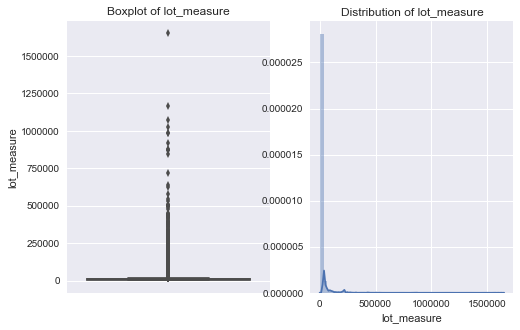

In [228]:
attributeAnalysis (dataSet.lot_measure)  

<b>Findings:</b>
* The distribution is not normalized. There are 2 clusters
* Postitive skewed and long tail. 
* 2425 Outliers. We will decide on removing outliers after performinh bi-variant analysis with target column.
* No missing values.

#### 3.1.2 ceil_measure Attribute

Range : Min - 290.0  Max - 9410.0
Mean : 1788.4  
Median : 1560.0 
Standard Deviation :  828.1 
1st Quartile (25%) : 1190.0
2nd Quartile (50%) : 1560.0
3st Quartile (75%) : 2210.0
IQR : 1020.0 
Ouliers  :  [6070 3810 4040 4320 3990 4630 8860 4360 3810 4070 3920 4400 4460 3750
 6530 4820 4475 5040 3900 4080 4130 3960 4080 5550 4570 4220 3850 6120
 4340 4060 3860 4980 3830 4040 3820 4560 4020 3900 7880 4090 6660 3940
 3830 4070 4750 6350 3810 3860 4190 4380 7320 4810 4020 4350 4290 3820
 4030 3880 5000 5830 4270 3920 4930 4500 5320 3960 4140 4090 3800 4410
 4470 6090 4000 5180 4010 4285 3840 3990 3950 4440 4060 5370 3790 4150
 3920 3810 4010 3750 4120 4610 4050 3750 4130 3920 5060 3750 4420 4040
 4500 4450 3830 4410 4660 3780 4540 3940 6110 3800 4070 4060 4040 3960
 4030 4060 3880 4670 3860 4040 4340 4250 4030 4210 3770 5180 3970 4490
 3950 4150 4280 4040 6380 4010 3820 4660 4065 5990 4350 4830 5610 3750
 4310 3745 4670 4130 3930 5450 6640 4240 3830 3780 3760 4070 5760 4140
 4410 4000 41

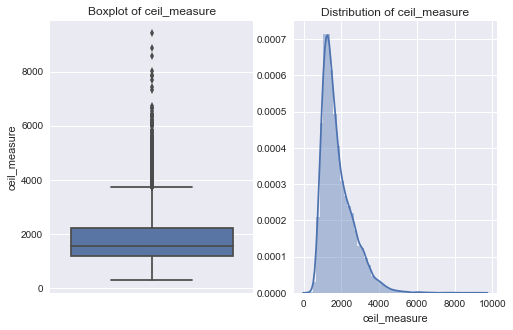

In [229]:
attributeAnalysis (dataSet.ceil_measure) 

<b>Findings:</b>
* The distribution looks normalized.
* Postitive skewed and long tail. 
* 611 Outliers. We will decide on removing outliers after performing bi-variant analysis with target column.
* No missing values.

#### 3.1.3 basement Attribute

Range : Min - 0.0  Max - 4820.0
Mean : 291.5  
Median : 0.0 
Standard Deviation :  442.6 
1st Quartile (25%) : 0.0
2nd Quartile (50%) : 0.0
3st Quartile (75%) : 560.0
IQR : 560.0 
Ouliers  :  [1720 1800 1450 1570 1600 1590 2120 1590 1800 1570 1540 1430 1750 1460
 1950 1420 1440 1510 1540 2010 1410 1520 1450 4820 2850 2220 1790 1420
 2030 1440 1490 2550 1500 1420 1760 1500 1610 1830 2060 1520 1410 1600
 1460 1450 1500 1600 1800 1580 1780 2490 1480 1540 1590 1500 1790 1480
 1700 1600 1940 1510 1960 1580 1570 1900 1500 1481 1620 1500 1500 1548
 1420 1840 2310 1720 1600 1710 1620 2070 1940 1852 1500 1600 1460 1430
 1690 1430 2550 1650 1690 2810 1520 1510 1800 1530 1420 1650 2040 1850
 1620 1830 1660 1816 1500 1600 1530 1660 1590 1740 1550 1720 2020 1780
 1670 1550 1540 1460 1660 2620 1430 1440 1420 1560 2130 1500 1500 1410
 1810 1660 1530 1580 1570 1860 2220 1690 1650 1780 1430 1890 1500 2390
 1440 1490 1580 2020 2090 1550 1740 1700 1640 1480 1660 1470 1580 1700
 1820 1480 1790 2720 2060 1

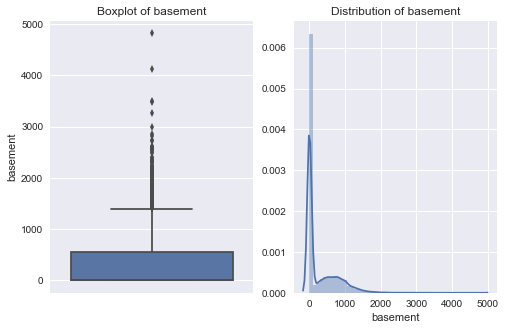

In [231]:
attributeAnalysis (dataSet.basement) 

<b>Findings:</b>
* The distribution is not normalized. It has 2 clusters
* Postitive skewed and long tail. 
* 496 Outliers. We will decide on removing outliers after performing bi-variant analysis with target column.
* No missing values.

#### 3.1.4 ceil Attribute

Range : Min - 1.0  Max - 3.5
Mean : 1.5  
Median : 1.5 
Standard Deviation :  0.5 
1st Quartile (25%) : 1.0
2nd Quartile (50%) : 1.5
3st Quartile (75%) : 2.0
IQR : 1.0 
Ouliers  :  []
Count of Ouliers  :  0
Skewness : 0.62
Count of missing values : 0
Number of Zeros : 0


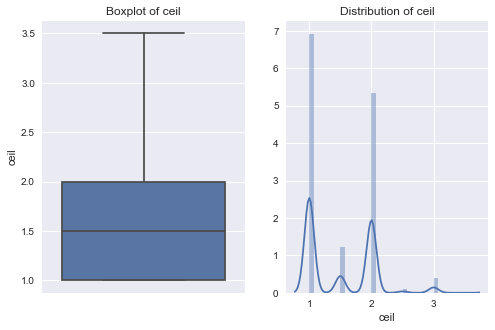

In [232]:
attributeAnalysis (dataSet.ceil)  

<b>Findings:</b>
* The distribution is not normalized. There are 4 clusters
* Postitive skewed. 
* 0 Outliers
* No missing values.

#### 3.1.5 room_bed Attribute

Range : Min - 0.0  Max - 11.0
Mean : 3.4  
Median : 3.0 
Standard Deviation :  0.9 
1st Quartile (25%) : 3.0
2nd Quartile (50%) : 3.0
3st Quartile (75%) : 4.0
IQR : 1.0 
Ouliers  :  [ 6  6  6  6  1  1  6  6  8  1  1  1  6  1  6  1  1  6  1  6  6  1  1  1
  1  1  7  1  1  1  1  8  6  1  1  6  1  1  6  0  6  8  9  6  7  6  6  6
  0  6  1  6  1  1  1  7  6  6  6  8  1  6  8  6  1  6  1  6  1  6  6  7
  6  1  1  6  6  6  1  6  1  1  6  6  6  6  7  8  1  6  1  6  6  6  6  6
  6  6  6  1  1  6  6  6  1  6  6  6  1  1  6  1  6  1  6  6  6  6  8  1
  6  6  6  6  1  7  1  6  1  6  6  6  6  1 10  6  6  1  6  6  6  1  6  6
  6  1  6  6  1  7  6  1  1  6  7  6  6  1  6  1  1  1  6  6  6  6  6  6
  6  1  6  7  6  6  1  7  6  7  1  6  7  1  1  1  0  6  9  7  6  6  6  6
  8  1  0  6  6  1  1  6  1  1  1  6  6  1  6  1  1  7  6  1  1  6  6  1
  6  1  6  6  7  6  6  6  6  6  6  6  1  1  0  1  6  1  6  7  1  1  1  1
  6  1  6  6  1  6  6  6  6  1  1  6  1  6  6  6  6  7  1  6  6  6  6  6
  6  6  6  1  1

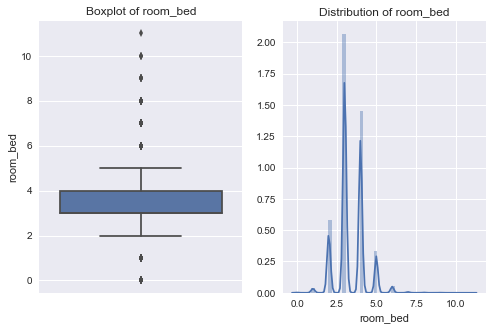

In [240]:
attributeAnalysis (dataSet.room_bed)  

<b>Findings:</b>
* The distribution is not normalized. It has lot of clusters
* Postitive skewed and long tail. 
* 546 Outliers. We will decide on removing outliers after performing bi-variant analysis with target column.
* There are 13 records with 0 bed rooms, it can be a valid case. 

#### 3.1.6 room_bath Attribute

Range : Min - 0.0  Max - 8.0
Mean : 2.1  
Median : 2.2 
Standard Deviation :  0.8 
1st Quartile (25%) : 1.8
2nd Quartile (50%) : 2.2
3st Quartile (75%) : 2.5
IQR : 0.8 
Ouliers  :  [4.   4.5  4.5  5.25 4.75 4.25 4.   5.   7.75 3.75 4.5  3.75 3.75 5.5
 6.75 4.25 4.5  4.   3.75 4.25 4.5  3.75 3.75 3.75 4.5  3.75 6.25 4.
 3.75 4.   5.   3.75 4.   3.75 4.75 3.75 4.   0.   3.75 4.75 4.   5.75
 3.75 3.75 4.25 3.75 5.5  3.75 4.   4.   4.   0.   4.   5.   4.25 3.75
 4.   5.5  4.   4.75 4.   4.   4.5  3.75 4.   5.25 4.5  4.5  4.   3.75
 4.   4.5  5.25 3.75 4.25 4.25 3.75 4.5  4.   4.25 4.5  5.   4.25 4.75
 5.5  3.75 3.75 3.75 3.75 4.   3.75 3.75 3.75 4.   4.25 4.   5.25 6.
 4.   5.   3.75 4.   3.75 3.75 3.75 3.75 5.25 4.5  4.   4.5  3.75 4.5
 3.75 3.75 4.25 4.25 5.   3.75 4.   4.   4.   3.75 4.5  5.25 3.75 4.5
 4.5  4.25 4.5  3.75 4.25 4.   5.5  4.   4.75 0.5  4.   5.   4.5  3.75
 4.   4.   4.5  4.5  4.25 4.5  5.5  3.75 3.75 4.5  5.   4.   4.   4.25
 6.   3.75 3.75 3.75 6.   4.5  4.25 4.75 3.75

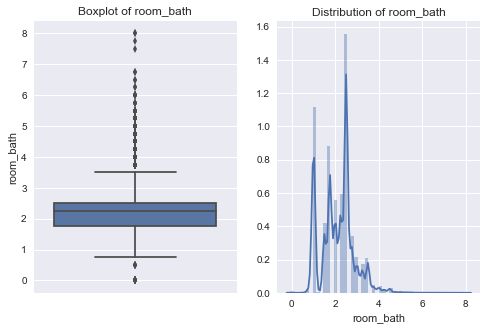

In [234]:
attributeAnalysis (dataSet.room_bath)  

<b>Findings:</b>
* The distribution is not normalized. There are lot of clusters
* Postitive skewed. 
* 571 Outliers. We will decide on removing outliers after performing bi-variant analysis with target column.
* There are 10 records with 0 bath rooms, it can be a valid case. 

#### 3.1.7 age_sold Attribute

Range : Min - -1.0  Max - 115.0
Mean : 43.3  
Median : 40.0 
Standard Deviation :  29.4 
1st Quartile (25%) : 18.0
2nd Quartile (50%) : 40.0
3st Quartile (75%) : 63.0
IQR : 45.0 
Ouliers  :  []
Count of Ouliers  :  0
Skewness : 0.47
Count of missing values : 0
Number of Zeros : 430


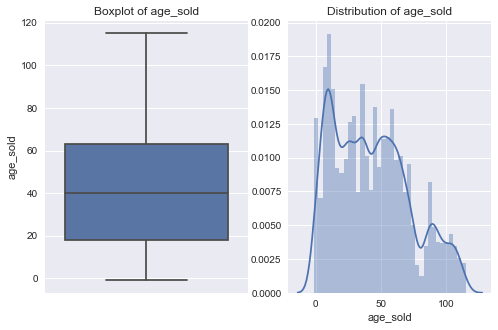

In [235]:
attributeAnalysis (dataSet.age_sold)  

<b>Findings:</b>
* The distribution is not normalized. There are lot of clusters
* Postitive skewed. 
* No outliers
* No missing values. There 430 records with 0 age, it means the house was sold on same year it was built.

#### 3.1.8 Price Attribute

Range : Min - 75000.0  Max - 7700000.0
Mean : 540182.2  
Median : 450000.0 
Standard Deviation :  367362.2 
1st Quartile (25%) : 321950.0
2nd Quartile (50%) : 450000.0
3st Quartile (75%) : 645000.0
IQR : 323050.0 
Ouliers  :  [1450000 1570000 1660000 ... 1980000 2300000 1500000]
Count of Ouliers  :  1159
Skewness : 4.02
Count of missing values : 0
Number of Zeros : 0


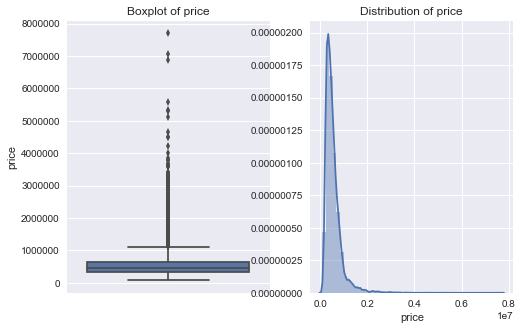

In [236]:
attributeAnalysis (dataSet.price)  

<b>Findings:</b>
* The distribution is kind of normalized
* Postitive skewed with long tail.
* There are 1159 outliers.
* No missing values. 

#### 3.2 Fix data issues in columns


In [239]:
# In one of the record there is 33 bed rooms which might be a typo. Replace it will 3.
dataSet.loc[dataSet.room_bed == 33, 'room_bed'] = 3

In [241]:
# There 12 records for which year built is 2015 and year sold is 2014. We will fix by replacing year built as 2014

dataSet.loc[dataSet.age_sold == -1, 'yr_built'] = 2014
dataSet.loc[dataSet.age_sold == -1, 'age_sold'] = 0

In [244]:
dataSet.to_csv('formated_innercity.csv') 

## Questions to be asked in next session

1. Do we need to consider Lat and Long?
2. Bed Room, Bath Room and Ceil - Should we consider as Categorical? 
3. Drop living_measure15 & lot_measure15 ?